In [ ]:
import pandas as pd
import numpy as np

In [ ]:
temp_df = pd.read_csv('IMDB Dataset.csv')

**1. Data Gatering**

In [ ]:
#As session is getting crashed for all 50k reviews to process, we take 10k reviews only
df = temp_df.iloc[:10000]

In [ ]:
df.sample(5)

,review,sentiment
919,"After many, many years I saw again this beauti...",positive
6108,this was the most pointless film i have ever s...,negative
5577,"I am a huge, huge fan of John Cusack, Samuel L...",negative
8361,Gentleman Jim is another case of print the leg...,positive
4172,This might be the WWE's 2nd best PPV of the ye...,positive


In [ ]:
df.shape

(10000, 2)

**We have 50k reviews and their sentiments in the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


**No missing values found in the dataset.**



In [ ]:
#a review example
df['review'][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


<Axes: xlabel='sentiment'>

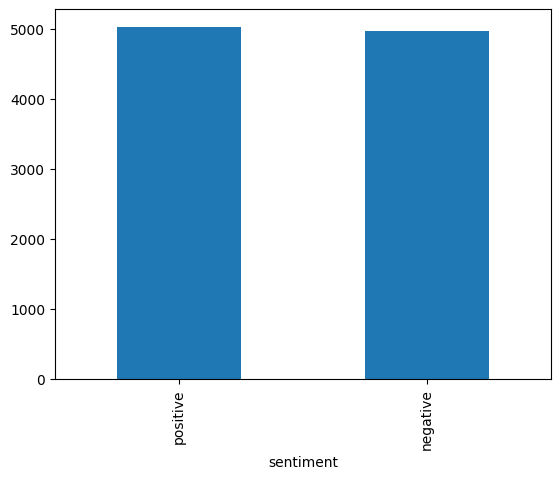

In [ ]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')

**We have balanced dataset with us.**

In [ ]:
df[df.duplicated()].shape

(17, 2)

**We have some duplicates.**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(9983, 2)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5023
negative,4960


In [ ]:
df['review'][40]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. <br /><br />This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. <br /><br />If you are looking for mindless entertainment, I still wouldn't recommend this movie."

**2.Text preprocessing**

*  Removing html tags
*  Lowering Casing
*  Removing punctuations
*  Spelling corrections(time taking)
*  Removing stopwords
*  Stemming



In [ ]:
#removing html tags
import re
def remove_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)


In [ ]:
df['review'] = df['review'].apply(remove_tags)

In [ ]:
df['review'][40]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. If you are looking for mindless entertainment, I still wouldn't recommend this movie."

In [ ]:
#lowercasing
df['review'] = df['review'].str.lower()

In [ ]:
df['review'][40]

"it had all the clichés of movies of this type and no substance. the plot went nowhere and at the end of the movie i felt like a sucker for watching it. the production was good; however, the script and acting were b-movie quality. the casting was poor because there were good actors mixed in with crumby actors. the good actors didn't hold their own nor did they lift up the others. this movie is not worthy of more words, but i will say more to meet the minimum requirement of ten lines. james wood and cuba gooding, jr. play caricatures of themselves in other movies. if you are looking for mindless entertainment, i still wouldn't recommend this movie."

In [ ]:
#removing punctuations
import string
exclude = string.punctuation
def remove_punctuations(text):
  return text.translate(str.maketrans('','',exclude))

In [ ]:
df['review'] = df['review'].apply(remove_punctuations)

In [ ]:
df['review'][40]

'it had all the clichés of movies of this type and no substance the plot went nowhere and at the end of the movie i felt like a sucker for watching it the production was good however the script and acting were bmovie quality the casting was poor because there were good actors mixed in with crumby actors the good actors didnt hold their own nor did they lift up the others this movie is not worthy of more words but i will say more to meet the minimum requirement of ten lines james wood and cuba gooding jr play caricatures of themselves in other movies if you are looking for mindless entertainment i still wouldnt recommend this movie'

In [ ]:
#spell check(time taking process)
#from textblob import TextBlob
#def spell_check(text):
#  return str(TextBlob(text).correct())
#df['review'] = df['review'].apply(spell_check)

In [ ]:
#removing stopwords as not much useful in sentiment analysis
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in list]).apply(lambda x:" ".join(x))
#df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review'][40]

'clichés movies type substance plot went nowhere end movie felt like sucker watching production good however script acting bmovie quality casting poor good actors mixed crumby actors good actors didnt hold lift others movie worthy words say meet minimum requirement ten lines james wood cuba gooding jr play caricatures movies looking mindless entertainment still wouldnt recommend movie'

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])



In [ ]:
df['review'] = df['review'].apply(stem_words)

In [ ]:
df['review'][40]

'cliché movi type substanc plot went nowher end movi felt like sucker watch product good howev script act bmovi qualiti cast poor good actor mix crumbi actor good actor didnt hold lift other movi worthi word say meet minimum requir ten line jame wood cuba good jr play caricatur movi look mindless entertain still wouldnt recommend movi'

**Train test split**

In [ ]:
X = df.iloc[:,0]
y = df['sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y[:100]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(7986,)

In [ ]:
X_test.shape

(1997,)

**3. Text Vectorization**

In [ ]:
#Applying Bag of words(BOW) technique
#taking only 5000 top words in corpus
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)


X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()



In [ ]:
X_train_bow.shape


(7986, 5000)

In [ ]:
#each word has 5000 cols
print(X_train_bow[100])
X_test_bow[100].shape

[0 0 0 ... 0 0 0]


(5000,)

**4. Modelling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)




In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8387581372058087

In [ ]:
confusion_matrix(y_test,y_pred)

array([[801, 151],
       [171, 874]])

**USING TF_IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_pred_tf = rf.predict(X_test_tfidf)

In [ ]:
accuracy_score(y_test,y_pred_tf)

0.8382573860791187

In [ ]:
confusion_matrix(y_test,y_pred_tf)

array([[802, 150],
       [173, 872]])

In [ ]:
'''
import pickle
pickle.dump(pipe, open('GBRModel.pkl','wb'))
files.download('GBRModel.pkl')
'''